# Outlier Detection
The concept outlier detection looks simple. By the definition outlier detection means to identify anomolies in the data. For example, you have data which they have a visible trend but there are some data points which don't follow the the trend. These data points might be recorded wrong. So you need to identify these data points. The data points which follow the trend are called inlier. Outlier detection is an unsupervised learning approach. 

In [56]:
import pandas as pd
import numpy as np
from sklearn import base
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM
from sklearn import metrics, datasets
import matplotlib.pyplot as plt
from scipy import stats

### Support Vector Machines (SVM)
Let's see how to separate the blue dots from red dots. Assuming blue dots are true observations. 

In [57]:
x_train = datasets.load_iris().data[:,:2]
x_test = np.random.random((15,2))*np.array([7,3])+np.array([2,1])

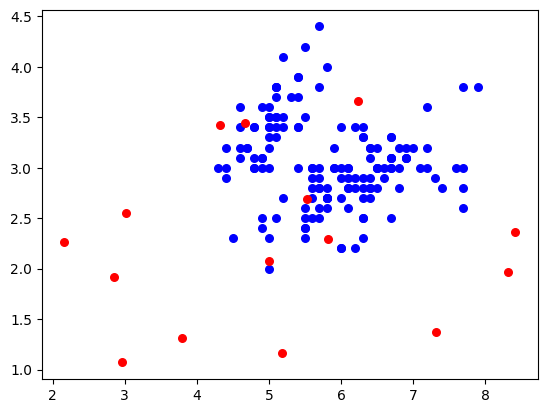

In [58]:
def plot(X, c='blue'):
    plt.scatter(X[:,0], X[:,1], s=30, c=c)
    
plot(x_train, c='blue')
plot(x_test, c="red")

In [62]:
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(x_train)
y_pred = one_class_svm.predict(x_test)

In [63]:
y_pred

array([ 1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1])

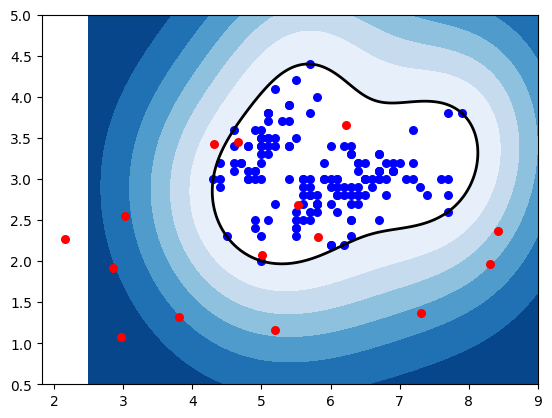

In [66]:
xx, yy = np.meshgrid(np.linspace(2.5, 9, 500), np.linspace(0.5, 5, 500))
Z = one_class_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plot(x_train)
plot(x_test,c="red")